To visualize the quantum state in phase space using the Wigner Function.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

def build_jc_hamiltonian(N, w_c, w_a, g):

    a = tensor(destroy(N), qeye(2))
    
    sz = tensor(qeye(N), sigmaz())  
    sm = tensor(qeye(N), sigmam()) 

    a_dag = a.dag()
    sp = sm.dag()  
    
    H_cavity = w_c * a_dag * a
    H_atom   = (w_a * 0.5) * sz
    H_int    = g * (a_dag * sm + a * sp) 
    H = H_cavity + H_atom + H_int
    
    return H

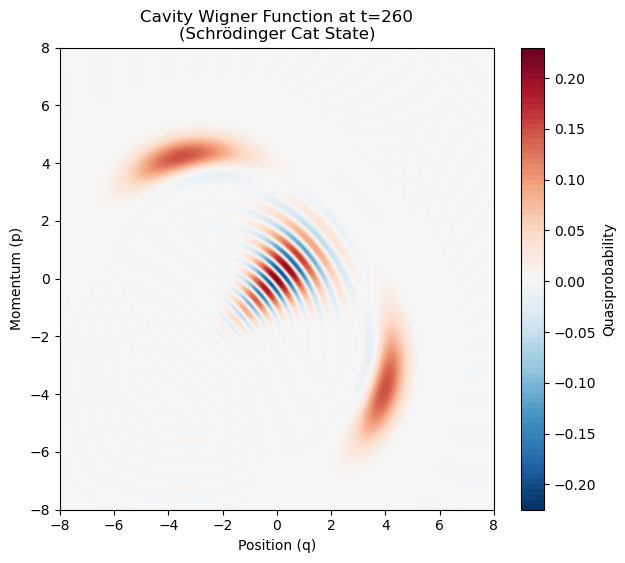

In [10]:
N_cutoff = 60        
omega_c  = 1.0
omega_a  = 1.0
g_coup   = 0.05

H_sys = build_jc_hamiltonian(N_cutoff, omega_c, omega_a, g_coup)

alpha = np.sqrt(15) 
t_target = 260
tlist_cat = np.linspace(0, t_target, 100) 

# Initial state 
psi0 = tensor(coherent(N_cutoff, alpha), basis(2, 0))

# Running mesolve with empty expectation list [] so it returns output.states
output_cat = mesolve(H_sys, psi0, tlist_cat, [], [])

# Extract the final state at the target time
final_state_sys = output_cat.states[-1]

# 3. Trace out the Atom
# We only want to look at the Cavity field. ptrace(0) keeps the 0-th subsystem (cavity)
rho_cavity = final_state_sys.ptrace(0)

# 4. Calculate Wigner Function
xvec = np.linspace(-8, 8, 200)
W = wigner(rho_cavity, xvec, xvec)

# 5. Plotting the Cat
fig, ax = plt.subplots(figsize=(7, 6))
cont = ax.contourf(xvec, xvec, W, 100, cmap="RdBu_r") 
# RdBu_r is Red-Blue-Reverse: Red=Positive, Blue=Negative (Quantum Interference)

ax.set_xlabel('Position (q)')
ax.set_ylabel('Momentum (p)')
ax.set_title(f'Cavity Wigner Function at t={t_target}\n(Schrödinger Cat State)')
plt.colorbar(cont, label="Quasiprobability")
ax.grid(False)

plt.show()

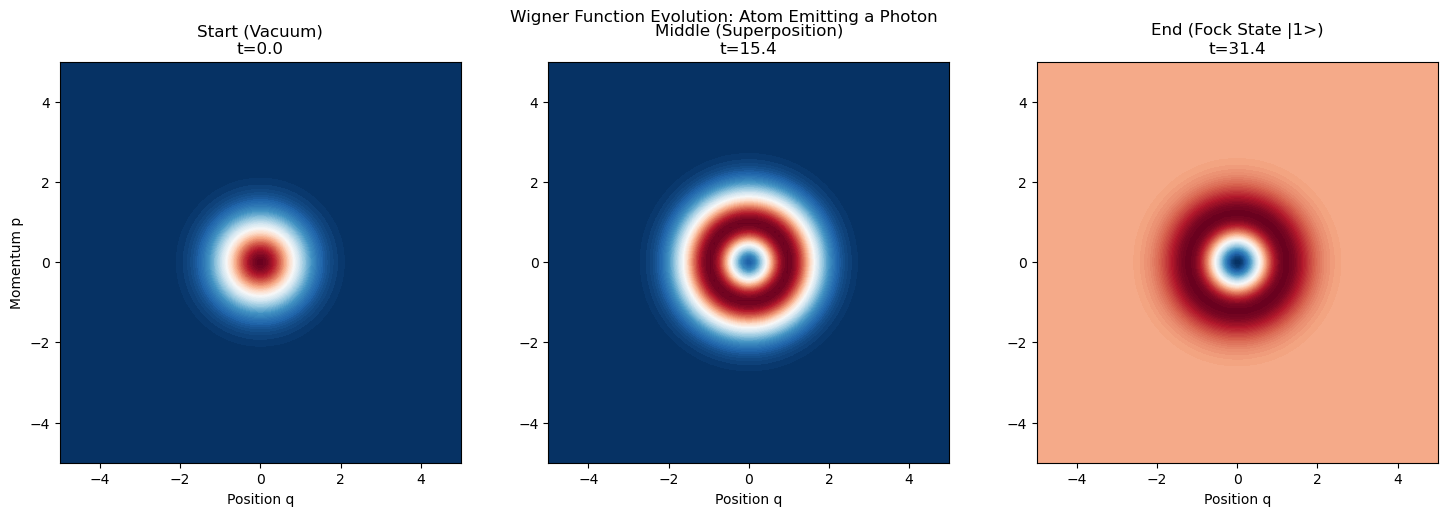

In [ ]:
# 2. Parameters
N = 60        # Hilbert space size
w = 1.0             # Resonant frequency
g = 0.05            # Coupling strength

H = build_jc_hamiltonian(N, w, w, g)

# --- 3. Initial State ---
# Atom Excited (|e>), Cavity Vacuum (|0>)
psi0 = tensor(basis(N, 0), basis(2, 0))

# --- 4. Time Evolution ---
# We want exactly one half-Rabi cycle (Vacuum -> 1 Photon)
# Time = pi / (2 * g)
T_rabi = np.pi / (2 * g)
tlist = np.linspace(0, T_rabi, 50)

# Get states (pass empty list [] for observables)
output = mesolve(H, psi0, tlist, [], [])

# --- 5. Visualization: Wigner Snapshots ---
# We will look at Start, Middle, and End
indices = [0, 24, -1] 
labels = ["Start (Vacuum)", "Middle (Superposition)", "End (Fock State |1>)"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
xvec = np.linspace(-5, 5, 100)

for i, idx in enumerate(indices):
    # Get total state
    state_total = output.states[idx]
    
    # TRACE OUT the atom to see the Cavity
    rho_cavity = state_total.ptrace(0)
    
    # Calculate Wigner function
    W = wigner(rho_cavity, xvec, xvec)
    
    # Plot
    cont = axes[i].contourf(xvec, xvec, W, 100, cmap="RdBu_r")
    axes[i].set_title(f"{labels[i]}\nt={tlist[idx]:.1f}")
    axes[i].set_xlabel("Position q")
    if i == 0: axes[i].set_ylabel("Momentum p")
    axes[i].set_aspect('equal')

plt.suptitle("Wigner Function Evolution: Atom Emitting a Photon")
plt.tight_layout()
plt.show()